# Análisis Exploratorio de los datasets

In [1]:
import glob

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

import sklearn
import rdkit

from rdkit.Chem.rdmolfiles import MolFromSmiles
from rdkit.Chem            import AllChem

## full

Este dataset incluye una sección de la información contenida en el dataset de <https://omdb.mathub.io/dataset>.

En este dataset hay un archivo *"omdb_smile_data_set.csv"* que contiene: (CODID) id de la molécula, (SMILE) que contiene la cadena con la representación de la molécula y (bgs) el valor de los band-gap hasta 2 decimales.

In [2]:
data_dir = 'datasets/full'

omdb_df = pd.read_csv(f'{data_dir}/omdb_smile_data_set.csv')

print(omdb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11368 entries, 0 to 11367
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CODID   11368 non-null  int64  
 1   SMILE   11368 non-null  object 
 2   bgs     11368 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 266.6+ KB
None


In [3]:
for i, smile in enumerate(omdb_df['SMILE']):
	print(smile)
	if i > 10: break

[Mo]1234([P]5(OC)N(C)CCN5C)(P5N(C)CCN5C)([cH]5[cH]1[cH]2[cH]3[cH]45)C#[O]
Clc1c(Cl)ccc(c1)[C@H](Cl)[C@H](Cl)[C@H](O)C(=O)OC.Clc1c(Cl)ccc(c1)[C@@H](Cl)[C@@H](Cl)[C@@H](O)C(=O)OC
O[C@H]1[C@H]2[C@H](NCc3c4OCOc4ccc23)c2c(C1)cc1OCOc1c2.O[C@@H]1[C@@H]2[C@@H](NCc3c4OCOc4ccc23)c2c(C1)cc1OCOc1c2
Clc1ccc2c(NCCCl)ccnc2c1
OC(=O)Cc1c[nH]c2cc(ccc12)CC
N1(c2ccccc2C(O)C1=O)C
c1(ccccc1)[C@H]1C[C@@H]([C@@H](CO1)C=C)O.c1(ccccc1)[C@@H]1C[C@H]([C@H](CO1)C=C)O
[C@@]123CCCC[C@]41[C@H](C[C@@H]2OC4=O)C3=C.[C@]123CCCC[C@@]41[C@@H](C[C@H]2OC4=O)C3=C
O=C1CC(CC1)C(=O)O
N1C(=O)OC(/C1=C/C(C)(C)C)(OCC)C1CCCCC1
O=C1O[C@@H]2[C@@H]([C@@H]3[C@@](C=CC3=O)(CC2)C)C1.O=C1O[C@H]2[C@H]([C@H]3[C@](C=CC3=O)(CC2)C)C1
Fc1c(OC)c(F)c(F)c(c1F)C#C


In [6]:
valid_smiles = list()
valid_mols   = list()

for i, smile in enumerate(omdb_df['SMILE']):
	test_mol = MolFromSmiles(smile)
	if test_mol is not None:
		try:
			test_mol_coor  = AllChem.ComputeMolShape(test_mol, boxDim=(20, 20, 20), spacing=0.5)
		except Exception as e:
			continue
		valid_smiles.append(i)
		valid_mols.append(test_mol)

print(f'N_valid smiles: {len(valid_smiles)}')

[14:21:29] Explicit valence for atom # 23 O, 3, is greater than permitted
[14:21:29] Explicit valence for atom # 22 O, 3, is greater than permitted
[14:21:29] Explicit valence for atom # 0 B, 4, is greater than permitted
[14:21:29] Explicit valence for atom # 0 B, 6, is greater than permitted
[14:21:29] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 16 17 18 19 20
[14:21:29] Can't kekulize mol.  Unkekulized atoms: 2 3 4 7 8 9 10 14 17 18 27 28
[14:21:29] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13 15 16
[14:21:29] Explicit valence for atom # 3 B, 6, is greater than permitted
[14:21:29] Explicit valence for atom # 1 H, 2, is greater than permitted
[14:21:29] Explicit valence for atom # 1 B, 4, is greater than permitted
[14:21:29] Explicit valence for atom # 1 O, 3, is greater than permitted
[14:21:29] Can't kekulize mol.  Unkekulized atoms: 5 7 8 9 10
[14:21:29] Explicit valence for atom # 19 F, 2, is greater than permitted
[14:21:29] Explicit valence for atom # 2 C

N_valid smiles: 0


[14:21:32] Explicit valence for atom # 0 B, 6, is greater than permitted
[14:21:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[14:21:32] Explicit valence for atom # 6 H, 2, is greater than permitted
[14:21:32] Explicit valence for atom # 6 O, 3, is greater than permitted
[14:21:32] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 8 9 10 11
[14:21:32] Explicit valence for atom # 0 B, 6, is greater than permitted
[14:21:32] Can't kekulize mol.  Unkekulized atoms: 7 8 9 12 13 14 15 22 23 24 25
[14:21:32] Explicit valence for atom # 15 C, 5, is greater than permitted
[14:21:32] Explicit valence for atom # 3 Ga, 4, is greater than permitted
[14:21:32] Explicit valence for atom # 7 C, 5, is greater than permitted
[14:21:32] Explicit valence for atom # 10 C, 5, is greater than permitted
[14:21:32] Can't kekulize mol.  Unkekulized atoms: 3 4 5 10 11 12
[14:21:32] Explicit valence for atom # 6 F, 2, is greater than permitted
[14:21:32] Explicit valence for atom # 0 N, 4, is

In [15]:
print(len(valid_smiles), len(omdb_df['SMILE']))

test_smile     = omdb_df['SMILE'][1]
test_rdkit_mol = MolFromSmiles(test_smile)
test_mol_coor  = AllChem.ComputeMolShape(test_rdkit_mol, confId=int(omdb_df['CODID'][1]), boxDim=(20, 20, 20), spacing=0.5) if test_rdkit_mol is not None else None

print(test_smile)
print(test_rdkit_mol)
print(test_mol_coor)

10644 11368


ValueError: Bad Conformer Id

In [3]:
elements :dict = dict()
data_info:list = list()
# info : {'elements': {element:number}, 'coordinates': np.array}

x_all:list = list()
y_all:list = list()
z_all:list = list()

for xyz_file in xyz_files:
	with open(xyz_file, 'r') as coor_file:
		n_elements = int(coor_file.readline())
		element_coor = np.zeros((n_elements, 3))
		element_qtty = dict()

		for i in range(n_elements):
			line = coor_file.readline()
			data = line.split()
			while len(data) < 1:
				line = coor_file.readline()
				data = line.split()

			if data[0] not in elements:
				elements[data[0]] = 0
			elements[data[0]] += 1
			if data[0] not in element_qtty:
				element_qtty[data[0]] = 0
			element_qtty[data[0]] += 1

			element_coor[i] = [float(coor) for coor in data[1:]]
			x_all.append(element_coor[i][0])
			y_all.append(element_coor[i][1])
			z_all.append(element_coor[i][2])

		data_info.append({'elements':element_qtty, 'coordinates':element_coor})
		coor_file.close()

x_all:np.ndarray = np.array(x_all)
y_all:np.ndarray = np.array(y_all)
z_all:np.ndarray = np.array(z_all)

coor_all:np.ndarray = np.array([x_all, y_all, z_all]).T

print(elements)
print(data_info[0]['elements'])
print(data_info[0]['coordinates'].shape)
print(coor_all.shape)

{'H': 394, 'C': 370, 'N': 56, 'O': 50, 'F': 16, 'Si': 4, 'S': 12, 'Cl': 14, 'Ca': 2, 'P': 8, 'Mo': 4}
{'H': 48, 'C': 76, 'N': 4, 'O': 4, 'F': 4}
(136, 3)
(930, 3)


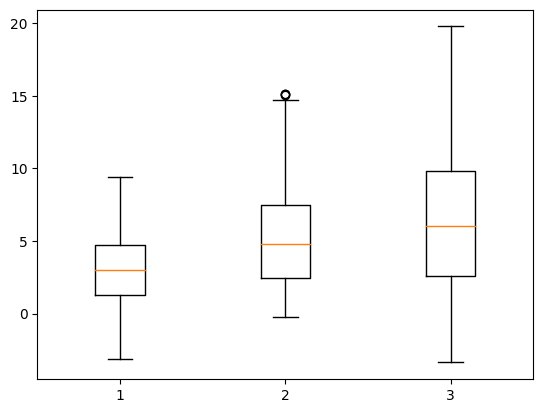

coordinate range [-3.368006, 19.782751] (23.150757000000002)
   ax1 coordinate range: [-3.114574, 9.428319]
   ax2 coordinate range: [-0.215971, 15.152241]
   ax3 coordinate range: [-3.368006, 19.782751]


In [4]:
plt.boxplot(x=coor_all, vert=True)
plt.show()

min_coor = np.min(coor_all)
max_coor = np.max(coor_all)
print(f'coordinate range [{min_coor}, {max_coor}] ({max_coor-min_coor})')
for i in range(3):
	print(f'   ax{i+1} coordinate range: [{np.min(coor_all[:,i])}, {np.max(coor_all[:,i])}]')

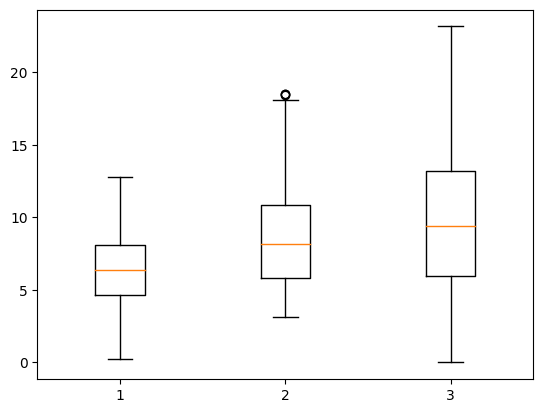

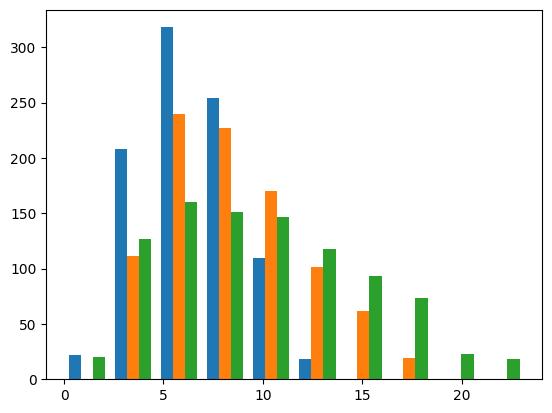

In [5]:
off_coor_all = coor_all - min_coor

plt.boxplot(x=off_coor_all, vert=True)
plt.show()

plt.hist(x=off_coor_all)
plt.show()

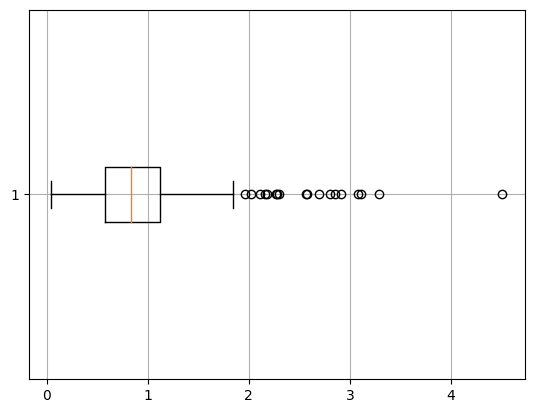

Media de la diferencia: 0.8968847383141587
Diferencia mínima     : 0.04481336368763274


In [6]:
# resulution   = 50
# n_collisions = 0

# for element in data_info:
# 	x_hist, _ = np.histogram(element['coordinates'][:, 0], bins=resulution)
# 	y_hist, _ = np.histogram(element['coordinates'][:, 1], bins=resulution)
# 	z_hist, _ = np.histogram(element['coordinates'][:, 2], bins=resulution)

# 	n_collisions += np.sum([x_hist-1, y_hist-1, z_hist-1])

# print(n_collisions)
coor_diff = np.zeros((int(np.ceil(off_coor_all.shape[0]/2))))

for i in range(coor_diff.shape[0]):
	min_coor_diff = np.inf
	for j in range(i+1, off_coor_all.shape[0]):
		min_coor_diff = min(
			min_coor_diff,
			np.linalg.norm(off_coor_all[i]-off_coor_all[j])
		)
	coor_diff[i] = min_coor_diff

plt.grid(True)
plt.boxplot(x=coor_diff, vert=False)
plt.show()

print(f'Media de la diferencia: {np.average(coor_diff)}')
print(f'Diferencia mínima     : {np.min(coor_diff)}')

In [7]:
Y = list()

for xv_file in xv_files:
	with open(xv_file, 'r') as tar_file:
		line = tar_file.readline()
		toks = line.split()

		Y.append(float(toks[0]))
Y = np.array(Y)

print(Y.shape)

(10,)


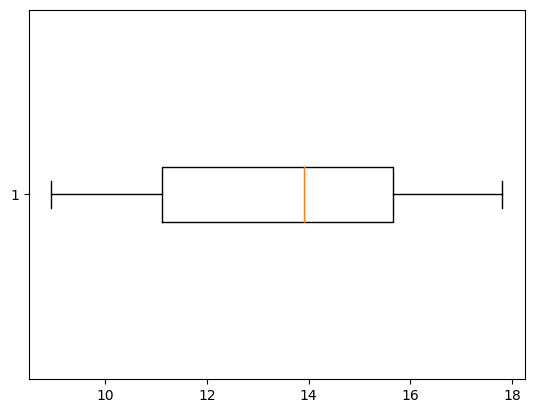

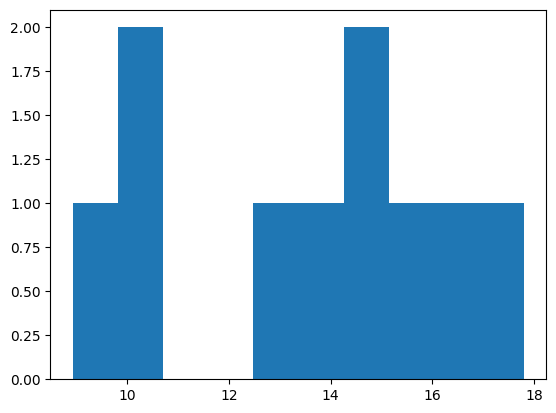

In [8]:
plt.boxplot(Y, vert=False)
plt.show()

plt.hist(Y)
plt.show()